# Relatório de Análise I - Abrindo Arquivos e vendo características
* O pandas é uma ferramenta de manipulação e análise de dados
* Aqui está o básico do python: abrir arquivos, exportar, manipular arquivos de várias formas
* Para apresentar essas ferramentas vou fazer análises de um banco de dados de alguel

#### Links úteis:
* https://pandas.pydata.org
* https://matplotlib.org
* https://www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/

## Importando Base de Dados 

#### É possível abrir arquivos csv deste tipo, assim como também é possível abrir outros tipos de arquivos como excel, json, e afins. Para isto alteramos pd.read_csv para pd.read_json (exemplo)

* Importar as pd é uma conveção da comunidade

In [1]:
import pandas as pd

 * comando para chamar o pandas e ler arquivo csv. O Sep = ';' indica o separador de colunas

In [2]:
dados = pd.read_csv('dados/aluguel.csv',sep = ';')  

In [3]:
dados.head()  #Para olhar as 5 primeiras linhas do dataframe

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
type(dados)   #O dados é do tipo dataframe. Um dataframe é composto de várias series

pandas.core.frame.DataFrame

## Informações Gerais sobre a Base de Dados

* Como obter algumas informações dos dados, como quantiade de dados, quantidade de variáveis, arquivos nulos e afins.
* dados.info() retorna informações dos dados: quantidade total de colunas, de linhas, de dados nulos e o tipo de dado incluso.
* Muito bom para encontrar os dados nulos( null/ missing)
* **dados missing/null/NaN:** são ausências de dados

In [5]:
dados.info()   #Retorna informações dos dados: quantidade total de colunas, de linhas, de dados nulos e o tipo de dado incluso
# Muito bom para encontrar os dados nulos( null/ missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


**O RangeIndex dá a quantidade de linhas no dataframe. Os Non-Null Count mostra quantidade de valores não nulos naquela coluna**

**O .dtypes mostra os tipos de dados em cada coluna**

In [6]:
dados.dtypes   #Olha quais os tipos de dados eu tenho na Base de Dados

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

#### Outro forma que criar um dataframe é utilizar o comando pd.DataFrame como abaixo
* o dado.dtypes são os dados que quero colocar, e o columns = é o nome da coluna

In [8]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.head()

,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64


In [8]:
tipos_de_dados.columns.name = 'Variáveis'

In [9]:
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [11]:
dados.shape   # Apresenta quantas linhas e colunas eu tenho (linhas, colunas)

(32960, 9)

In [13]:
print(f'A base de dados apresenta {dados.shape[0]} registoros e {dados.shape[1]} variáveis')

A base de dados apresenta 32960 registoros e 9 variáveis


# Relatório de Análise II - Selecionando Variáveis

### Nesta Seção vou mostrar como manipular os dataframes, selecionando variável, juntando com outros dataframes, mudando index

* Temos um conjunto de dados mostrado abaixo e quero seleciona só a variável Tipo. 
* Depois quero ver quais dados estão contidos na variável Tipo e excluir os dados iguais.

In [20]:
dados.head() 

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


#### selecionando variável e identificado-as

In [21]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [22]:
tipo_de_imoveis = dados.Tipo   #Guardando os tipos numa variável

In [24]:
tipo_de_imoveis.drop_duplicates()   # Exclui as repetições existentes na variável.

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [29]:
tipo_de_imoveis.drop_duplicates(inplace=True) # O Argumento inplace = True Altera a variável tipo_de_imoveis

In [30]:
tipo_de_imoveis

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

### Organizando Visualização

* Fazer Dataframe com os tipos obtidos
* Mudar o index 

In [32]:
tipo_de_imovel = pd.DataFrame(tipo_de_imoveis)
tipo_de_imovel.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio


In [33]:
#Abaixo eu peço para mostrar o index. Este index sem organização pode ser alterado
tipo_de_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

* Alterando o index

In [36]:
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio


### Como Concatenando DataFrames?
* Concatenar é juntar dois ou mais 

In [38]:
df1 = pd.DataFrame([['A','A','a'],[1,1,1]])
df1

,0,1,2
0,A,A,a
1,1,1,1


In [39]:
df2 = pd.DataFrame([['b','b','b'],[2,2,2]])
df2

,0,1,2
0,b,b,b
1,2,2,2


In [40]:
df3 = pd.concat([df1,df2],axis = 0)     #axis = 0 signfica que vamos ocorrer a concatenação pela linha
df3

,0,1,2
0,A,A,a
1,1,1,1
0,b,b,b
1,2,2,2


In [41]:
df4 = pd.concat([df1,df2],axis = 1)     #axis = 1 signfica que vamos ocorrer a concatenação pela coluna
df4

,0,1,2,0,1,2
0,A,A,a,b,b,b
1,1,1,1,2,2,2


# Relatório de Análise 3 - Selecionando dados

## Quero selecionar apenas imóveis Residenciais de um DataFrame

In [9]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [10]:
list(dados['Tipo'].drop_duplicates())    # Observando quais variáveis exitem nos dados da variável Tipo

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [11]:
residencial = ['Quitinete','Casa', 'Apartamento', 'Casa de Condomínio', 'Flat', 'Casa de Vila',]     
# criando uma lista com apenas imóveis residenciais.

**O que será feito abaixo é criar uma variável que seleciona o que eu quero. Neste caso o que é eu quero são Tipos de imóveis que estão na minha lista residencial. O comando .isin(residencial) verifica se cada linha da coluna tipo faz parte ou não da lista. Se fizer parte irá retornar o valor True, do contrário, irá retornar False**

In [12]:
selecao = dados['Tipo'].isin(residencial)    #O argumento .isin() retorno resultados Booleanos indicando se cada linha no
#dataFrame está dentro da lista residencial criada

In [13]:
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [14]:
dados_residencial = dados[selecao]  
dados_residencial.head(10)
# Quando passamos a selecao dentro do nosso dataframe ela irá seleciona apenas as linhas com valor True da selecao.

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [15]:
dados_residencial.shape[0]

23056

In [16]:
dados_residencial.index = range(dados_residencial.shape[0])  # mudnado o index

In [17]:
dados_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### Exportando a Base de Dados

**Queremos exportar a base de dados abaixo,e o comando que faz isso é .to_csv(Coloque aqui o diretório e o separador, e index = false)**

In [18]:
dados_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [19]:
# O argumento index = False serve para não colocar o index ao salvar
dados_residencial.to_csv('dados/aluguel_residencial.csv', sep =';', index =  False)

# Relatório de Análise 4 - Seleções e Frequências
* Note que agora estamos importando o dados do aluguel residencial

In [20]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [21]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [22]:
#Selecionar somente imóveis do tipo apartamento
dados['Tipo'].isin(['Apartamento'])
dados_apartamento = dados[dados['Tipo'].isin(['Apartamento'])]
dados_apartamento.index = range(dados_apartamento.shape[0])
dados_apartamento.shape[0]

19532

**O comando sort_values organiza em ordem alfabética ou crescente o dataframe(df), para organizar por colunas utiliza axis = 0**

In [23]:
# Selecionar Somente Imóveis do tipo Casa, Casa de Condomínio e Casa de Vila
dados_casas = dados[dados['Tipo'].isin(['Casa', 'Casa de Condomínio', 'Casa de Vila'])]
dados_casas.index = range(dados_casas.shape[0])
#Organizando o df
dados_casas.sort_values(by ='Tipo',axis = 0, inplace = True)
dados_casas.head()

<ipython-input-23-b75d6b18c2bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_casas.sort_values(by ='Tipo',axis = 0, inplace = True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
1202,Casa,Braz de Pina,3,2,0,90,2000.0,NaN,296.0
1200,Casa,Moneró,5,2,1,278,3500.0,NaN,3997.0
1199,Casa,Quintino Bocaiúva,2,1,0,55,1000.0,17.0,NaN
1191,Casa,Maracanã,3,0,0,105,1700.0,NaN,90.0


### Selecione os imóveis com área maior de 60 metros e menor de 100 metros
* A forma de seleção abaixo funciona utilizando operador e (&). Caso queira usar operador ou utilizar (or)

In [24]:
(dados['Area']>=60) & (dados['Area']<=100)
dados_Area = dados[(dados['Area']>=60) & (dados['Area']<=100)]
dados_Area.shape[0]

8975

### Seleciona os imoveis que tenha pelo menos 4 quartos e aluguel menor que R$ 2000

In [30]:
dados_quartos = dados[(dados['Quartos']>=4) & (dados['Valor']<2000)]
dados_quartos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
491,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1018,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2000,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
2142,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
2241,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0


In [31]:
print(f'Nº de imóveis do tipo apartamento: {dados_apartamento.shape[0]}')
print(f'Nº de Imóveis do tipo Casa, Casa de Condomínio e Casa de Vila: {dados_casas.shape[0]}') 
print(f'Nº de imóveis com área maior de 60 metros e menor de 100 metros: {dados_Area.shape[0]}') 
print(f'Nº de imoveis que tenha pelo menos 4 quartos e aluguel menor que R$ 2000: {dados_quartos.shape[0]}')

Nº de imóveis do tipo apartamento: 19532
Nº de Imóveis do tipo Casa, Casa de Condomínio e Casa de Vila: 2212
Nº de imóveis com área maior de 60 metros e menor de 100 metros: 8975
Nº de imoveis que tenha pelo menos 4 quartos e aluguel menor que R$ 2000: 41


# Relatório de Análise 5 - Dados nulos/missing
* O que fazer quando encontro dados nulos?

In [32]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep =';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Primeira coisa a fazer
* Ver se tem valor nulo, e o isnull() ajudar nisso retornando como True se for nulo

In [83]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
23051,False,False,False,False,False,False,False,False,False
23052,False,False,False,False,False,False,False,False,False
23053,False,False,False,False,False,False,False,False,False
23054,False,False,False,False,False,False,False,False,False


**Abaixo temos um selecionador de variáveis nulas apenas na coluna Valor**

In [33]:
dados[dados['Valor'].isnull()]  #Utilizando os operador isnull() apenas na coluna Valor

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
60,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1521,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1715,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2052,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2074,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
5047,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8753,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
9141,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9346,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


### Retirando o valor missing
#### O argumento.dropna serve para tirar os valores missings. O argumento subset serve para indicar qual ou quais colunas

In [34]:
#Eliminando registros NaN no Valor
A = dados.shape[0]  #Para ver quantos registros tinha
dados.dropna(subset = ['Valor'], inplace = True)
B = dados.shape[0]
A-B  # para verificar que foram excluídos 9 itens

9

In [35]:
dados[dados.Valor.isnull()] #Verificando se tem valores missing ainda

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [36]:
dados[dados['Condominio'].isnull()].shape[0]

1856

In [37]:
selecao = (dados['Tipo']== 'Apartamento') & (dados['Condominio'].isnull())   #seleciona tipo apartamento com condomínio nulo

#### O argumento ~ indicar que quero o contrário do que foi pedido. No exemplo abaixo será obtido todos os dados menos aqueles que sejam apartamento E condomínio com valor nulo. Logo o que for apartamento E condomínio nulo irá ser apagado

In [38]:
dados =  dados[~selecao]

In [39]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


## Alterando o valor missing
**O argumento fillna completa o valor missing com o valor dado. Para isso é passado um dicionário onde a chave é a coluna e o valor é para qual valor deverá ser trocado. Note que é importante se preocupar se faz ou não sentido retirar ou alterar o valor nulo**

In [40]:
dados = dados.fillna({'Condominio':0, 'IPTU':0})

In [41]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [42]:
dados[dados['Condominio'].isnull()].shape[0]

0

In [43]:
dados[dados['IPTU'].isnull()].shape[0]

0

In [44]:
dados.info()   # Outra forma de ver quantos valores missing tem o dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22302 entries, 0 to 23055
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22302 non-null  object 
 1   Bairro      22302 non-null  object 
 2   Quartos     22302 non-null  int64  
 3   Vagas       22302 non-null  int64  
 4   Suites      22302 non-null  int64  
 5   Area        22302 non-null  int64  
 6   Valor       22302 non-null  float64
 7   Condominio  22302 non-null  float64
 8   IPTU        22302 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [45]:
#Salvando os dados alterados
dados.to_csv('dados/aluguel_residencial.csv', sep = ';', index = False)

# Relatório de Análise 6 - Alterando Colunas no Dataset

In [46]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep =';')

In [47]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


## Criando Colunas
### Vamos criar uma nova coluna (nova variável) com o valor bruto a ser pago
#### Para criando uma nova variável utilizando o código dados['Valor Bruto'] = . Após a igualdade é passado o que deseja que tenha nesta coluna. 
#### Algumas possibilidades:
* Fazer conta com as colunas
* Fazer conta com numpy
* colocar um Array numpy como valor

In [48]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] +dados['IPTU']

In [49]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0


### Criando valor por metro quadrado

In [50]:
dados['Valor por m²'] = round(dados['Valor']/dados['Area'],2)

In [51]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor por m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00


In [52]:
dados['Valor Bruto por m²'] = round(dados['Valor Bruto']/dados['Area'],2)

In [53]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor por m²,Valor Bruto por m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28


### Vamos criar uma nova varível que selecione todos os tipos de casas e identifique apenas como casa, e o restante como apartamento

In [54]:
casa = ['Casa','Casa de Condomínio', 'Casa de Vila']

#### O argumento apply aplica uma função ao que se deseja. No caso abaixo a função coloca todas as linhas como casa se o dado da linha estiver na lista casa. Caso não esteja será colocado apartamento

In [55]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [56]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor por m²,Valor Bruto por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


## Excluindo Colunas
#### Criei um novo DataFrame apenas como exemplo

In [57]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado','Valor Bruto por m²', 'Valor Bruto', 'Valor por m²']])

In [58]:
dados_aux

,Tipo Agregado,Valor Bruto por m²,Valor Bruto,Valor por m²
0,Apartamento,56.50,2260.0,42.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,80.67,1210.0,53.33
3,Apartamento,21.46,1030.0,16.67
4,Apartamento,32.36,1618.0,26.00
...,...,...,...,...
22297,Apartamento,20.54,1438.0,12.86
22298,Apartamento,43.52,1175.0,29.63
22299,Apartamento,33.85,2640.0,23.08
22300,Apartamento,40.54,1946.0,29.17


### 1 Forma: del - É passado uma lista com as colunas desejadas a excluir

In [59]:
del dados_aux['Valor Bruto']

In [60]:
dados_aux

,Tipo Agregado,Valor Bruto por m²,Valor por m²
0,Apartamento,56.50,42.50
1,Casa,70.00,70.00
2,Apartamento,80.67,53.33
3,Apartamento,21.46,16.67
4,Apartamento,32.36,26.00
...,...,...,...
22297,Apartamento,20.54,12.86
22298,Apartamento,43.52,29.63
22299,Apartamento,33.85,23.08
22300,Apartamento,40.54,29.17


### 2 forma: .pop( Coloca a variável aqui ) 

In [61]:
dados_aux.pop('Valor Bruto por m²')

0        56.50
1        70.00
2        80.67
3        21.46
4        32.36
         ...  
22297    20.54
22298    43.52
22299    33.85
22300    40.54
22301    53.71
Name: Valor Bruto por m², Length: 22302, dtype: float64

In [62]:
dados_aux.head()

,Tipo Agregado,Valor por m²
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
4,Apartamento,26.00


### 3 Forma: .drop(lista com as colunas desejadas). Deve ser passado o inplace= True

In [63]:
dados.drop(['Valor Bruto','Valor Bruto por m²'], axis = 1, inplace = True)  #axis =1 significa coluna

In [64]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [65]:
dados.to_csv('dados/aluguel_residencial.csv', sep =';', index = False) #Salvando os dados

# Relatório de Análise 7: Criando Agrupamento
* Agrupamento é bastante importante e pode ser usado em diversos momento para facilitar as análises

In [66]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep =';')

In [72]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [73]:
bairros = ['Barra da Tijuca', 'Copacabana','Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)

In [74]:
dados = dados[selecao]

In [75]:
dados['Bairro'].drop_duplicates() #Vendo se somente tem a minha seleção

0          Copacabana
5     Barra da Tijuca
12           Botafogo
16             Tijuca
20             Leblon
21            Ipanema
80           Flamengo
Name: Bairro, dtype: object

In [76]:
dados.index = range(dados.shape[0])

In [77]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
2,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
3,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
4,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


### Fazendo o grupo
#### O argumento que faz um grupo é o .groupby() onde dentro do parênteses é colocado a variável para montar o grupo
#### O interessante de fazer um grupo é avaliar algumas características por determinado grupo, como o valor e o condomínio por bairro.

In [78]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro   # Não irá apresentar um dataframe

In [79]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [80]:
grupo_bairro.groups

{'Barra da Tijuca': [1, 6, 8, 13, 19, 21, 22, 25, 26, 32, 33, 34, 35, 37, 39, 49, 52, 54, 56, 59, 67, 68, 71, 81, 83, 84, 90, 91, 94, 103, 104, 112, 114, 119, 121, 124, 125, 126, 128, 133, 135, 137, 139, 146, 147, 148, 149, 151, 153, 154, 160, 165, 166, 171, 179, 184, 185, 190, 192, 194, 196, 201, 205, 213, 214, 215, 216, 219, 224, 227, 231, 232, 234, 238, 239, 243, 249, 253, 255, 258, 265, 271, 272, 273, 274, 275, 278, 280, 281, 282, 283, 298, 299, 300, 302, 305, 306, 311, 315, 320, ...], 'Botafogo': [5, 14, 28, 44, 45, 55, 60, 64, 70, 107, 109, 122, 164, 181, 206, 207, 226, 252, 263, 264, 277, 304, 334, 353, 375, 396, 401, 415, 438, 440, 461, 497, 504, 508, 557, 576, 602, 610, 621, 623, 627, 634, 648, 673, 677, 678, 687, 703, 723, 731, 736, 742, 760, 781, 802, 805, 825, 862, 870, 902, 929, 930, 943, 951, 958, 962, 989, 990, 1022, 1036, 1043, 1044, 1059, 1095, 1101, 1113, 1123, 1131, 1136, 1157, 1174, 1175, 1179, 1181, 1182, 1184, 1190, 1215, 1216, 1228, 1232, 1241, 1262, 1265, 1292, 

* Abaixo vemos uma aplicação do agrupamento, fazer avaliações de dados por Bairro, por exemplo. 

In [83]:
# Quero a média do valor e do condimínio por bairro
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6975.94,3544.21
Botafogo,8522.79,981.77
Copacabana,4102.78,1155.30
Flamengo,4109.82,1101.63
Ipanema,9186.32,2288.05
Leblon,8588.07,2092.05
Tijuca,2043.52,711.69


### Estatísticas Descritiva
#### A função .describe() irá retornar uma estatística descritiva quanto ao que foi pedido. Irá apresentar média, contagem, mínimo, máximo, desvio padrão

In [84]:
grupo_bairro[['Valor']].describe().round(2)

Valor                                                       \
                  count     mean        std     min     25%     50%      75%   
Bairro                                                                         
Barra da Tijuca  3953.0  6975.94   11756.68   800.0  2500.0  4499.0   8500.0   
Botafogo          915.0  8522.79  148669.42   700.0  2200.0  3000.0   4310.0   
Copacabana       2705.0  4102.78    3578.85   100.0  2000.0  3000.0   4800.0   
Flamengo          717.0  4109.82    3831.59   800.0  1900.0  2900.0   4900.0   
Ipanema          1910.0  9186.32    7975.84  1200.0  4462.5  7000.0  10500.0   
Leblon           1320.0  8588.07    6880.92   100.0  4500.0  6800.0  10000.0   
Tijuca           1100.0  2043.52    1664.34   750.0  1500.0  1800.0   2300.0   

                            
                       max  
Bairro                      
Barra da Tijuca   600000.0  
Botafogo         4500000.0  
Copacabana         35000.0  
Flamengo           35000.0  
Ipanema            90000.0  
Leblon            100000.0  
Tijuca             45000.0

#### O método aggregate() é utilizado para retornar valores escalares utilizando alguma função. Neste caso pediu-se o mínimo e o máximo, mas poderia pedir também a soma, média

In [85]:
grupo_bairro['Valor'].aggregate(['min','max']).rename(columns = {'min':'Mínimo','max':'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


## Fazendo gráficos com Pandas
#### O pandas possui uma forma fácil de fazer gráficos utilizando o seaborn e/ou o matplotlib. Abaixo farei os gráficos com o matplotlib, mas com o seaborn é bem mais fácil e bonito

### Importantdo a biblioteca matplotlib

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (10,7))

#### Para fazer o gráfico basta utilizar o .plot. Para escolher o estilo do gráfico utiliza-se o .bar para barra. Podendo ser também line, scatter

Text(0, 0.5, 'Valor média de Aluguel')

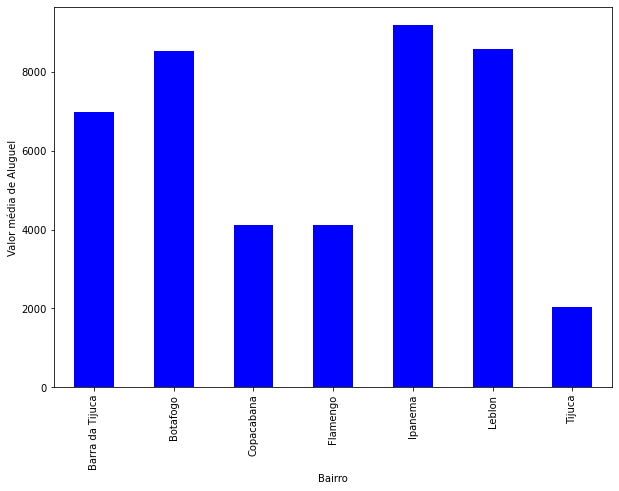

In [86]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'Blue')
fig.set_ylabel('Valor média de Aluguel')

#### No gráfico abaixo eu pedi pelo desvio padrão dos dados de Valor, condomínio e IPTU num gráfico de barras
#### Note que primeiro eu seleciono os dados que quero ( grupo_bairro[['Valor','Condominio','IPTU']].std() ) e depoisu eu peço para realizar o plot com ( .plot.bar(color = ['Blue','Red','g']) )

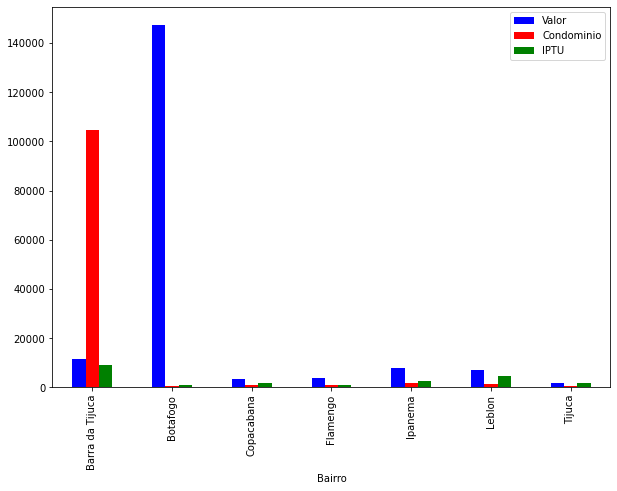

In [32]:
fig = grupo_bairro[['Valor','Condominio','IPTU']].std().plot.bar(color = ['Blue','Red','g'])

* **Neste gráfico acima percebemos que o condomínio e o valor em certos bairros tem um valor de desvio padrão muito alto, indicando que há algo estranho nos dados. Pode ser um dado que foi colocado errado e por isso temos que remove-los.**

# Relatório de Análise 8: Removendo outliers
#### Outliers são dados que estão distantes do valor médio e em consequência trazem altos desvios padrões. Remover eles é interessante, mas isto acarreta em outros outliers que deverão ser analisados para ver se deverão ser retirados ou não do dataframe

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (12,8))

In [88]:
dados = pd.read_csv('dados/aluguel_residencial.csv',sep=';')

#### O boxplot é um gráfico específico que apresenta o o valor da média, do desvio padrão, o 25%, o 75% e os outliers

<AxesSubplot:>

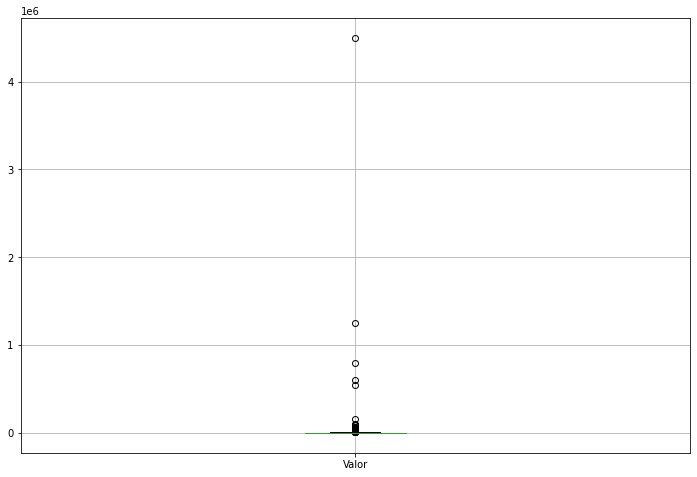

In [89]:
dados.boxplot(['Valor'])

In [90]:
valor = dados['Valor']

#### Abaixo segue a sequência de contas realizadas para remover outliers

In [91]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1-1.5*IIQ
limite_superior = Q3+1.5*IIQ

In [92]:
selecao = (valor>=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

#### No gráfico abaixo é possível visualizar melhor o que é o gráfico boxplot. Os pontos fora da área de linha preta são os outliers

<AxesSubplot:>

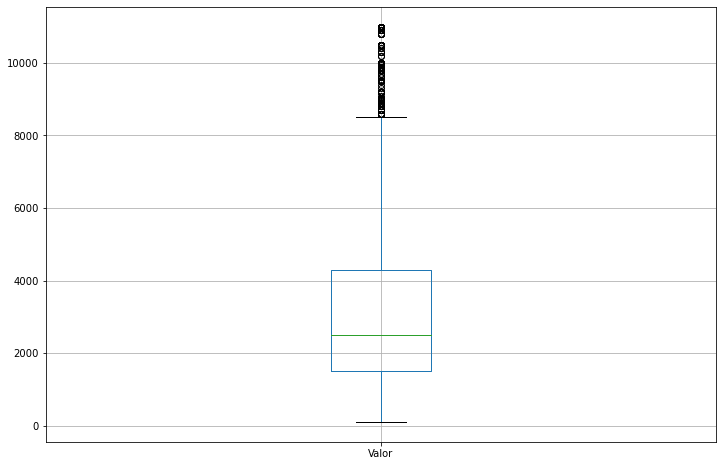

In [93]:
dados_new.boxplot(['Valor'])

* Acima é mais fácil observar como é um gráfico boxplot. Os valores fora das linhas horizontais pretas são os outliers. Como já foram removidos os primeiros outliers outros surgem no local. No entanto, nem sempre estes novos outliers são significativos como outliers

### Gráfico histograma para ver o valor
#### É mais comum estatisticamente um comportamento igual do segundo gráfico dado pela variável dados_new, em que retirou os outliers

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

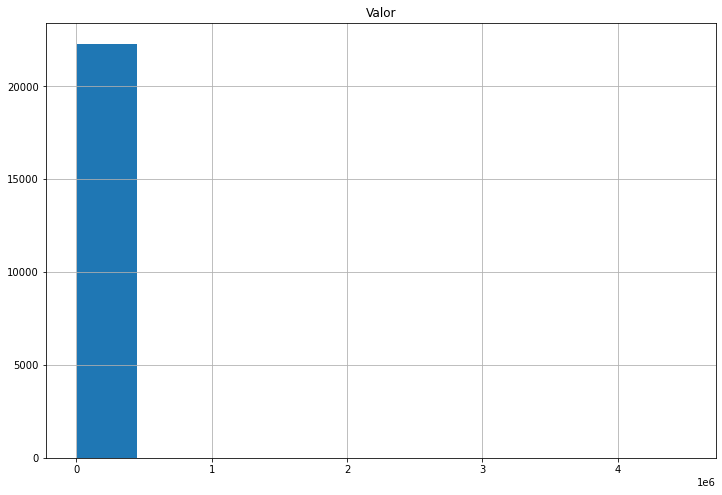

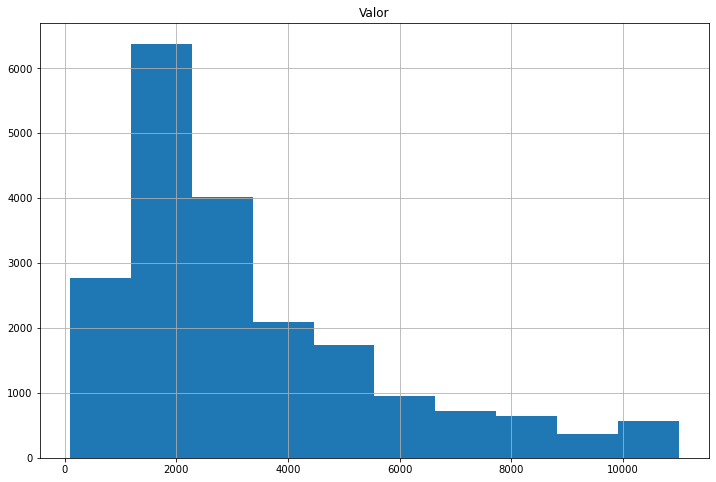

In [94]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

### Fazendo a análise por grupo 
#### O argumento by = seleciona quais variáveis quero analisar no gráfico. Isto é importante pois é possível que nem todas as variáveis tenham o mesmo comportamento

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

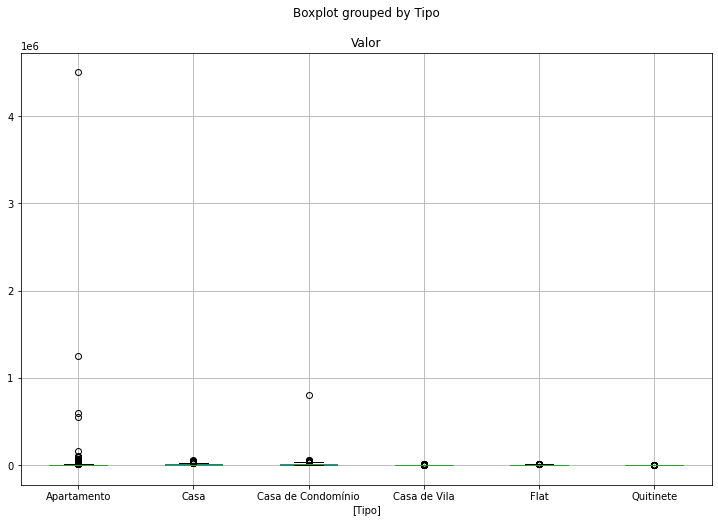

In [95]:
dados.boxplot(['Valor'],by = ['Tipo'])

In [96]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [97]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1-1.5*IIQ
limite_superior = Q3+1.5*IIQ

In [98]:
print(Q1,Q3, IIQ)

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Flat                  2500.0
Quitinete              900.0
Name: Valor, dtype: float64 Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Flat                   6000.0
Quitinete              1500.0
Name: Valor, dtype: float64 Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Flat                   3500.0
Quitinete               600.0
Name: Valor, dtype: float64


In [99]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys(): # vamos rodar as chaves
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite =(dados['Valor']>=limite_inferior[tipo]) & (dados['Valor']<=limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

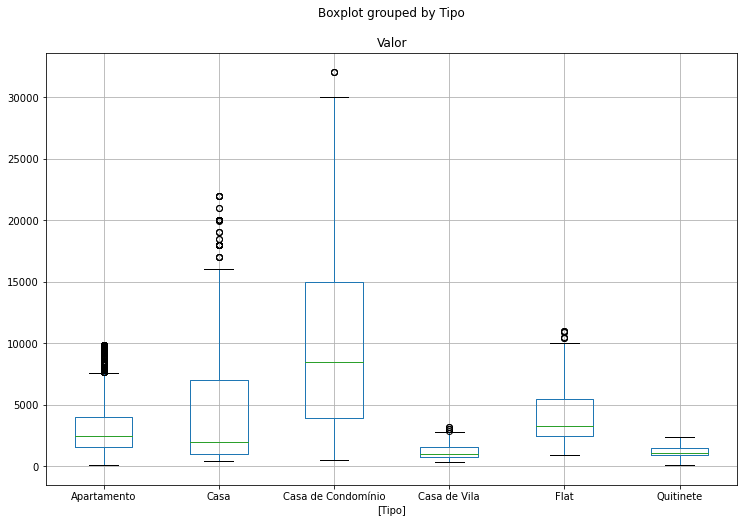

In [100]:
dados_new.boxplot(['Valor'],by = ['Tipo'])

In [101]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv',sep =';', index = False)